## import numpy and pandas 

In [1]:
import pandas as pd 
import numpy as np

## import visualization libraries and set %matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

## Read in csv files as dataframe df

In [3]:
df = pd.read_csv('911.csv')

## Check the info() of df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Top 5 zips for 911 calls 

In [8]:
df['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

## Top 5 towns for 911 calls

In [10]:
df['twp'].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

## To check how many unique title code are there

In [13]:
df['title'].nunique()

141

## Creating Features

In [14]:
x = df['title'].iloc[0]

In [15]:
x.split(':')[0]

'EMS'

In [16]:
df['Reason'] = df['title'].apply(lambda title : title.split(':')[0])

In [17]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
5             EMS
6             EMS
7             EMS
8             EMS
9         Traffic
10        Traffic
11        Traffic
12        Traffic
13        Traffic
14        Traffic
15        Traffic
16            EMS
17            EMS
18            EMS
19        Traffic
20        Traffic
21        Traffic
22           Fire
23        Traffic
24        Traffic
25            EMS
26            EMS
27           Fire
28        Traffic
29        Traffic
           ...   
423879    Traffic
423880    Traffic
423881    Traffic
423882    Traffic
423883        EMS
423884       Fire
423885    Traffic
423886    Traffic
423887        EMS
423888       Fire
423889    Traffic
423890       Fire
423891    Traffic
423892       Fire
423893       Fire
423894        EMS
423895        EMS
423896    Traffic
423897    Traffic
423898    Traffic
423899    Traffic
423900    Traffic
423901        EMS
423902    Traffic
423903    

In [18]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


## The most common reason for 911 call

In [20]:
df['Reason'].value_counts().head(5)

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

## Using seaborn to create a count plot of 911 calls by reason


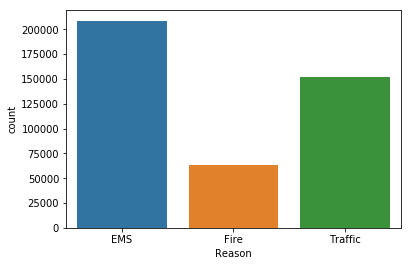

In [22]:
sns.countplot(x = 'Reason', data=df)

## Data types of the objects in timestamp column

In [24]:
type(df['timeStamp'].iloc[0])

str

## Converting strings to Datetime

In [25]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [27]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

## creating a new column hour,month and day of week

In [28]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)

In [29]:
df['Hour']

0         17
1         17
2         14
3         16
4         16
5         15
6         16
7         16
8         16
9         17
10        17
11        16
12        17
13        17
14        17
15        17
16        17
17        17
18        17
19        17
20        17
21        17
22        17
23        18
24        17
25        18
26        18
27        18
28        18
29        18
          ..
423879     8
423880     8
423881     8
423882     8
423883     8
423884     8
423885     8
423886     8
423887     8
423888     8
423889     8
423890     8
423891     8
423892     8
423893     8
423894     8
423895     8
423896     8
423897     8
423898     8
423899     8
423900     8
423901     8
423902     8
423903     8
423904     8
423905     8
423906     8
423907     8
423908     8
Name: Hour, Length: 423909, dtype: int64

In [30]:
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day Of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [31]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3


In [32]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [33]:
df['Day Of Week'] = df['Day Of Week'].map(dmap)

In [35]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu


## Using seaborn to count plot day of week column

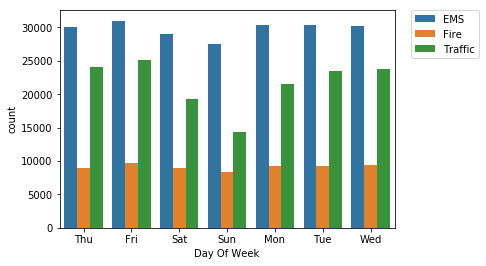

In [38]:
sns.countplot(x = 'Day Of Week', data=df, hue = 'Reason')
#To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [39]:
byMonth = df.groupby('Month').count()

In [40]:
byMonth


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of Week
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644
6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171
7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405
8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972
9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339


## creating a simple plot off the dataframe indicating the count of calls per month

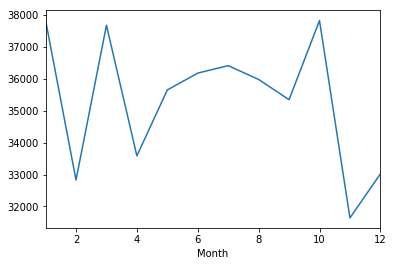

In [41]:
byMonth['lat'].plot()

No handles with labels found to put in legend.


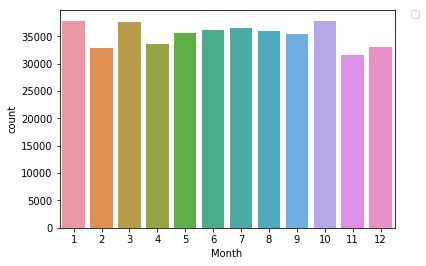

In [43]:
sns.countplot(x = 'Month', data=df)
#To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

## Plotting a linear fit using seaborn lmplot

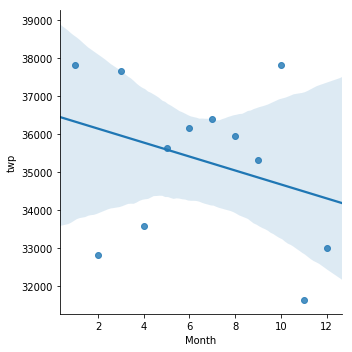

In [44]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

## Creating a new date column

In [45]:
t = df['timeStamp'].iloc[0]

In [46]:
df['Date'] = df['timeStamp'].apply(lambda t : t.date())

In [49]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


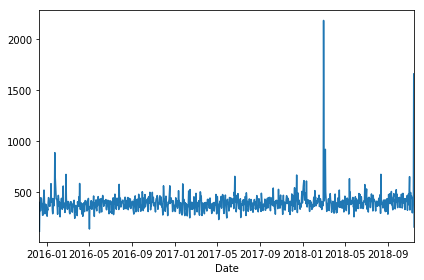

In [52]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

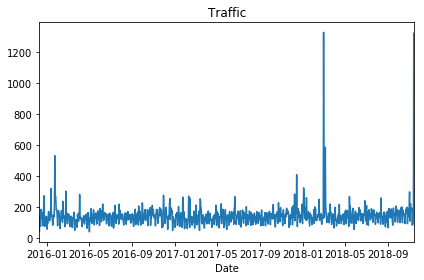

<Figure size 864x432 with 0 Axes>

In [61]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()
plt.figure(figsize=(12,6))


## Creating heatmaps using seaborn with our data

In [56]:
dayHour = df.groupby(by=['Day Of Week','Hour']).count()['Reason'].unstack()

## Creating a heatmap with new dataframe

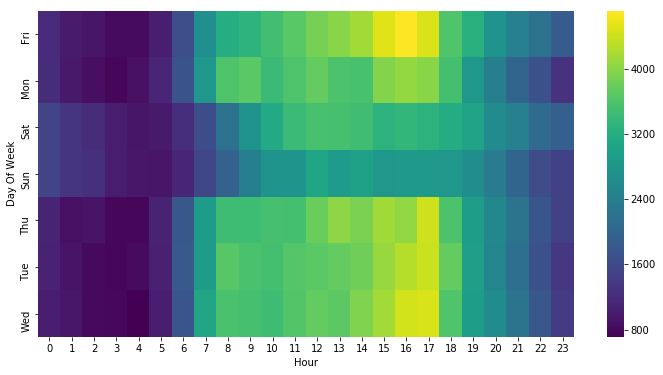

In [60]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

## Creating a cluster map using the new dataframe

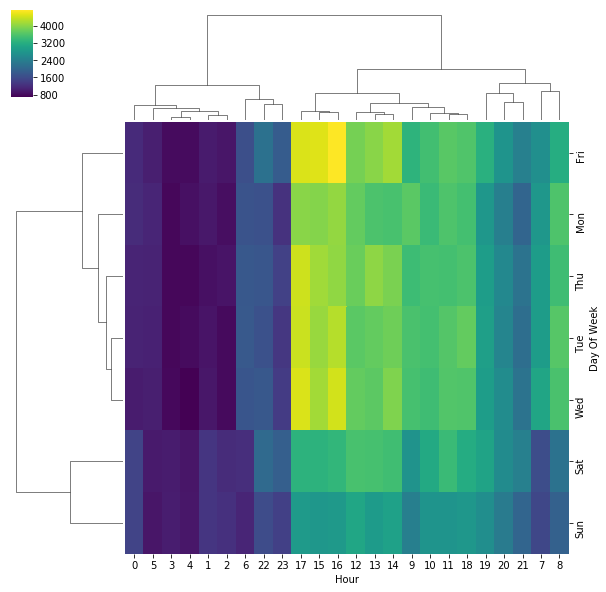

In [63]:
sns.clustermap(dayHour,cmap='viridis')